## **Gathering and Extracting Data:**

>in this section we will collect data of WeRateDogs from Twitter using Tweepy API and tweets ids provided in twitter-archive-enhanced.csv file

In [1]:
#imporing all needed libraries

import tweepy
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from io import BytesIO
import seaborn as sns

%matplotlib inline

**Tweepy API authorization**

In [2]:
#providing all authorization keys to connect with Tweepy API

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

#testing Api connection and extracting one tweet 
tweet = api.get_status('1198860382976106496', tweet_mode='extended')
print(tweet.retweet_count)
print(tweet.favorite_count)
print(tweet.full_text)

In [3]:
#reading twitter-archive-enhanced.csv in pandas
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [5]:
#check if there is any null values in tweet_id coloumn
pd.to_numeric(twitter_archive_df['tweet_id'], errors='coerce').notnull().all()

True

#extracting tweets contents from tweepy Api using ids saved in twitter-archive-enhanced.csv file
#storing extracted data in tweet_json.text file containing every tweet details

with open("tweet_json.txt", "w") as outfile:
    for tweet_id in twitter_archive_df['tweet_id']:
        #checking that all tweets ids has valid 18 length numbers
        if len(str(tweet_id)) == 18:
            try:
                tweet_json = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True)
                json.dump(tweet_json._json, outfile) 
                outfile.write("\n") 
        #ignoring invalid tweet ids and printing error
            except Exception as exp:
                    print(str(tweet_id) + str(exp))

In [6]:
json_data = []
with open('tweet_json.txt', 'r') as file: 
    json_tweet = file.readline()
    while json_tweet:
        json_dict = json.loads(json_tweet)
        json_data.append(json_dict)
        json_tweet = file.readline()
        
api_df = pd.DataFrame.from_dict(json_data)


**Image prediction data**

In [7]:
image_predict= req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', allow_redirects=True)

image_predict_df = pd.read_csv(BytesIO(image_predict.content), sep='\t')
image_predict_df.to_csv('image-predict.tsv', sep='\t', )


## Assessing Data
image_predict.content

In [8]:
#exploring json file and favorites and retweets counts
api_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36850,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7852,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31720,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5822,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23898,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3849,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40175,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8024,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38373,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,8671,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19301,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,2890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11250,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,1905,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",62134,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,17541,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26559,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,3981,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30405,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,6822,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [9]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2332 non-null object
display_text_range               2332 non-null object
entities                         2332 non-null object
extended_entities                2060 non-null object
favorite_count                   2332 non-null int64
favorited                        2332 non-null bool
full_text                        2332 non-null object
geo                              0 non-null object
id                               2332 non-null int64
id_str                           2332 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [10]:
api_df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2332.000000,2.332000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2332.000000
mean,7688.385506,7.419225e+17,7.440692e+17,2.040329e+16,8.113972e+17,2766.753431
std,11934.178955,6.822021e+16,7.524295e+16,1.260797e+17,6.295843e+16,4682.993858
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1334.750000,6.782728e+17,6.757073e+17,3.589728e+08,7.761338e+17,555.000000
50%,3343.500000,7.183508e+17,7.032559e+17,4.196984e+09,8.281173e+17,1294.500000
75%,9443.500000,7.986673e+17,8.233264e+17,4.196984e+09,8.637581e+17,3217.500000
max,159217.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79444.000000


In [11]:
api_df.duplicated(subset=['id']).any()

False

In [12]:
api_df.extended_entities[0]


{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}},
   'features': {'orig': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'medium': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'small': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'large': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]}}}]}

In [13]:
api_df.possibly_sensitive_appealable.value_counts()


False    2198
Name: possibly_sensitive_appealable, dtype: int64

In [14]:
api_df.possibly_sensitive.value_counts()


False    2198
Name: possibly_sensitive, dtype: int64

In [15]:
api_df.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}},
   'features': {'orig': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'medium': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'small': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'large': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]}}}]}

In [16]:
api_df[api_df.retweeted.notnull()].retweeted[0]


False

In [17]:
api_df[api_df.retweeted_status.notnull()].retweeted_status[31]


{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the nine-time World Series champion Athletics | #RootedIn

In [18]:
#exploring image_predict file content
image_predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predict_df.duplicated(subset=['tweet_id']).any()


False

In [22]:
#exploring twitter-archive-enhanced file data 
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
twitter_archive_df.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_archive_df.pupper.value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [27]:
twitter_archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
twitter_archive_df.puppo.value_counts()


None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
twitter_archive_df[twitter_archive_df['rating_numerator'] < 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [30]:
twitter_archive_df[twitter_archive_df['rating_denominator'] != 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


## Quality issues

**api_df table**

<ul>
<li>Zero Values columns (possibly_sensitive , possibly_sensitive_appealable ) which adds no value to our data</li>
<li>values in column Source contains href a html tag which we won't be using in any of our analysis. </li>
<li>not related columns data to the scope of our analysis ( user, favorited, retweeted ) </li>
<li>Null values columns (contributors, coordinates, geo, place, quoted status id, quoted status id str) which adds no value to our data</li>
</ul>

**image_predict table**
<p>
data is seperated in many different ways in columns (p1, p2, p3) like the use of (-, _)


**twitter_archive_df table**
<ul>
<li>different prefix of dog names ( a , an)</li>
<li>empty cells are not defined as null but instead defined as string</li>
<li>rating is not correctly defined/entered as mentioned</li>
<li>Column( doggo, floofer, puppo, and pupper )values either None or its column name</li>
<li>timestamp is not defined as datetime but instead defined as string</li>
</ul>

## Tideness issues

<ul>
<li>the p1, p2, p3 contain redundancy since the p1, p2, p3 is not unique throughout the row in image_predict</li>
<li>created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in api_df table and twitter_archive table</li>
<li>api_df and image_predict should be part of twitter_archive table</li>
<li>Entities data seems to contain image information which are already contain in the twitter archive data, like the image_url and extended url</li>
<li>Extended entities column contains duplicate information of the entities column</li>
</ul>

# Cleaning Data

In [31]:
#taking copies of all tables for cleaning and to confirm cleaning after
twitter_archive_df_clean = twitter_archive_df.copy()
image_predict_clean = image_predict_df.copy()
api_clean = api_df.copy()

## Tidiness

some of api_df data are retweets

**Define**

we only need the genuine tweets so we are going to drop all retweets and their data

**Code**

In [32]:
tweets_without_retweet = api_clean[api_clean.retweeted_status.notnull()].retweeted_status
tweets_without_retweet = pd.DataFrame(tweets_without_retweet.tolist())

In [33]:
api_clean = api_clean[api_clean.retweeted_status.isnull()]

api_clean = api_clean.drop(['retweeted_status'], axis=1)

In [34]:
api_clean = api_clean.append(tweets_without_retweet)


**Test**

In [39]:
api_clean.shape[0] == api_df.shape[0]

True

**Define**

data is seperated in many different ways in columns (p1, p2, p3) like the use of (-, _)


**Code**

In [40]:
predict_clean = pd.DataFrame()
temp = pd.DataFrame()

In [41]:
col_to_use = ['p1','p2', 'p3']

for col in col_to_use:
    temp = pd.DataFrame()
    temp['prediction'] = image_predict_clean[col]
    temp['is_dog'] = image_predict_clean[col+'_dog']
    if (col == 'p1'):
        predict_is_dog_clean = temp
    else:
        predict_is_dog_clean.append(temp)

**Test**

In [42]:
predict_is_dog_clean.drop_duplicates(inplace=True)


In [43]:
image_predict_clean = image_predict_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)


In [44]:
predict_is_dog_clean.duplicated(['prediction']).any()


False

In [45]:
image_predict_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p2          2075 non-null object
p2_conf     2075 non-null float64
p3          2075 non-null object
p3_conf     2075 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


**Define**

timestamp is not defined as datetime but instead defined as string

**Code**

In [46]:
twitter_archive_df_clean = twitter_archive_df_clean.drop([
    'timestamp', 'text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

**Test**

In [47]:
all_columns = pd.Series(list(api_clean) + list(twitter_archive_df_clean))
all_columns[all_columns.duplicated()]

Series([], dtype: object)

**Define**

Merging the api_df and image_predict table to the twitter_archive table, joining on tweet_id and id.

**Code**

In [48]:
twitter_archive_df_clean = pd.merge(api_clean, twitter_archive_df_clean,
                            left_on='id', right_on='tweet_id', how='right')

In [49]:
twitter_archive_df_clean = twitter_archive_df_clean.drop([
    'tweet_id'], axis=1)

In [50]:
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2497
Data columns (total 42 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2309 non-null object
display_text_range               2309 non-null object
entities                         2309 non-null object
extended_entities                2116 non-null object
favorite_count                   2309 non-null float64
favorited                        2309 non-null object
full_text                        2309 non-null object
geo                              0 non-null object
id                               2309 non-null float64
id_str                           2309 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-nu

In [51]:
twitter_archive_df_clean = pd.merge(twitter_archive_df_clean, image_predict_clean, left_on='id', right_on='tweet_id', how='left')

**Test**

In [52]:
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2497
Data columns (total 51 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2309 non-null object
display_text_range               2309 non-null object
entities                         2309 non-null object
extended_entities                2116 non-null object
favorite_count                   2309 non-null float64
favorited                        2309 non-null object
full_text                        2309 non-null object
geo                              0 non-null object
id                               2309 non-null float64
id_str                           2309 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-nu

## Quality

Removing columns which has empty values

**Define**

Dropping Null values columns (contributors, coordinates, geo, place, quoted status id, quoted status id str) which adds no value to our data

**Code**

In [53]:
twitter_archive_df_clean = twitter_archive_df_clean.drop([
    'user', 'favorited', 'retweeted', 'contributors', 
    'coordinates', 'geo', 'place', 'quoted_status_id', 
    'quoted_status_id_str'], axis=1)

**Test**

In [54]:
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2497
Data columns (total 42 columns):
created_at                       2309 non-null object
display_text_range               2309 non-null object
entities                         2309 non-null object
extended_entities                2116 non-null object
favorite_count                   2309 non-null float64
full_text                        2309 non-null object
id                               2309 non-null float64
id_str                           2309 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2309 non-null object
lang                             2309 non-null object
possibly_sensitive               2251 non-null object
possibly_sensitive_appealable    22

**Define**

Column in twitter_archive_df ( doggo, floofer, puppo, and pupper )values either None or its column name

**Code**

In [55]:
def use_true_or_false_for_column(archive, col_name):
    if archive[col_name] == col_name:
        return True
    else:
        return False
    
twitter_archive_df_clean['doggo'] = twitter_archive_df_clean.apply(
    use_true_or_false_for_column, args=('doggo',), axis=1)
twitter_archive_df_clean['floofer'] = twitter_archive_df_clean.apply(
    use_true_or_false_for_column, args=('floofer',), axis=1)
twitter_archive_df_clean['puppo'] = twitter_archive_df_clean.apply(
    use_true_or_false_for_column, args=('puppo',), axis=1)
twitter_archive_df_clean['pupper'] = twitter_archive_df_clean.apply(
    use_true_or_false_for_column, args=('pupper',), axis=1)

**Test**

In [56]:
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2497
Data columns (total 42 columns):
created_at                       2309 non-null object
display_text_range               2309 non-null object
entities                         2309 non-null object
extended_entities                2116 non-null object
favorite_count                   2309 non-null float64
full_text                        2309 non-null object
id                               2309 non-null float64
id_str                           2309 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2309 non-null object
lang                             2309 non-null object
possibly_sensitive               2251 non-null object
possibly_sensitive_appealable    22

**Define**

Zero Values columns (possibly_sensitive , possibly_sensitive_appealable ) which adds no value to our data

**Code**

In [57]:
twitter_archive_df_clean = twitter_archive_df_clean.drop([
    'possibly_sensitive','possibly_sensitive_appealable'], axis=1)

**Test**

In [58]:
twitter_archive_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2497
Data columns (total 40 columns):
created_at                    2309 non-null object
display_text_range            2309 non-null object
entities                      2309 non-null object
extended_entities             2116 non-null object
favorite_count                2309 non-null float64
full_text                     2309 non-null object
id                            2309 non-null float64
id_str                        2309 non-null object
in_reply_to_screen_name       77 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_status_id_str     77 non-null object
in_reply_to_user_id           77 non-null float64
in_reply_to_user_id_str       77 non-null object
is_quote_status               2309 non-null object
lang                          2309 non-null object
quoted_status                 24 non-null object
quoted_status_permalink       25 non-null object
retweet_count                 2309 n

**Define**

values in column Source contains href a html tag which we won't be using so we are going to extract only the link 

**Code**

In [59]:
twitter_archive_df_clean['source'] = twitter_archive_df_clean.source.str.extract(r'href="(.+?)"')


**Test**

In [60]:
twitter_archive_df_clean['source'].value_counts()


http://twitter.com/download/iphone              2163
http://vine.co                                   103
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

**Define**

empty cells are not defined as null but instead defined as string


**Code**

In [61]:
twitter_archive_df_clean.name.replace('None', np.nan, inplace=True)


**Test**

In [62]:
(twitter_archive_df_clean.name == 'None').any()


False

**Define**


different prefix of dog names ( a , an)

**Code**

In [63]:
twitter_archive_df_clean.name.replace(['a', 'an', 'the'], np.nan, inplace=True)


**Test**

In [64]:
(twitter_archive_df_clean.name == 'a').any()


False

**Define**

rating is not correctly defined/entered as mentioned


**Code**

In [65]:
twitter_archive_df_clean = twitter_archive_df_clean[(twitter_archive_df_clean.rating_numerator >= 10) & (twitter_archive_df_clean.rating_denominator == 10)]


**Test**

In [66]:
(twitter_archive_df_clean.rating_numerator < 10).any()


False

In [67]:
(twitter_archive_df_clean.rating_denominator != 10).any()


False

In [68]:
with open('twitter_archive_master.csv', 'w') as outfile:  
    outfile.write(twitter_archive_df_clean.to_csv(index=False))
    
with open('predictions_mapping_master.csv', 'w') as outfile:  
    outfile.write(predict_is_dog_clean.to_csv(index=False))

# Visualization

In [69]:
predict_mappings = pd.read_csv('predictions_mapping_master.csv')

In [70]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

predictions_mapping_master = pd.read_csv('predictions_mapping_master.csv')

In [71]:
sns.set(rc={'figure.figsize':(11.5,8.5)})
def setlabels(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

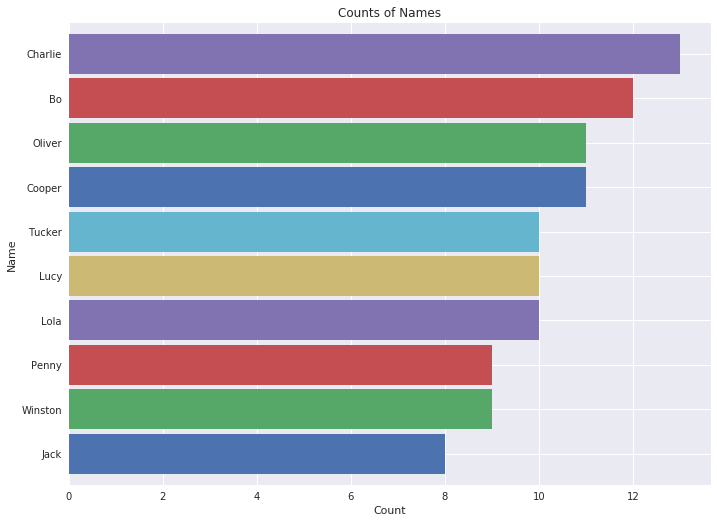

In [72]:
#Counts of Names - Histograms
twitter_archive_master.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('deep',10))
plt.title('Counts of Names')
setlabels('Count', 'Name')

Based on the above histogram, Charlie is the most popular name, followed by Bo and cooper

**what is the correlation between retweet count and favorite count?**

Text(0.5,1,'Favorite and Retweet Count')

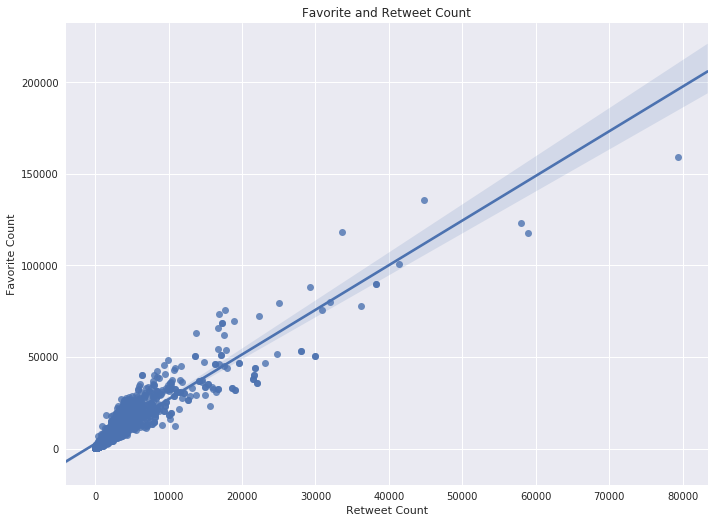

In [73]:
#Favorite and Retweet Count - Regplot
sns.set_palette("deep")
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=twitter_archive_master)
setlabels("Retweet Count", "Favorite Count")

plt.title('Favorite and Retweet Count')

From the above Regplot, its clear there is a correlation between favorite count and retweet count.

**what patterns for the rating given in the tweet?** <p>
based on the time the tweet was made.

Text(0.5,1,'The median rate of dog tweet per day')

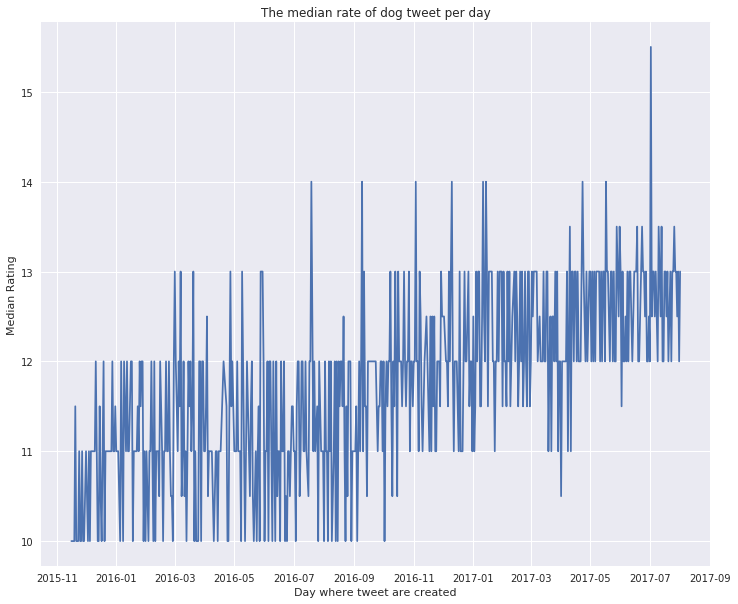

In [74]:
#Median of dog tweet per day - subplot

twitter_archive_master['created_at'] = pd.to_datetime(twitter_archive_master.created_at)

plt.subplots(figsize=(12,10))
twitter_archive_master.groupby(twitter_archive_master['created_at'].dt.date).median()['rating_numerator'].plot()
setlabels('Day where tweet are created', 'Median Rating')
plt.title('The median rate of dog tweet per day')

The above plot, not clear enough, it indicate an increase in the rating of the dog given. We will it divide it to bigger interval.

Text(0.5,1,'The Median rate of dog tweet per month')

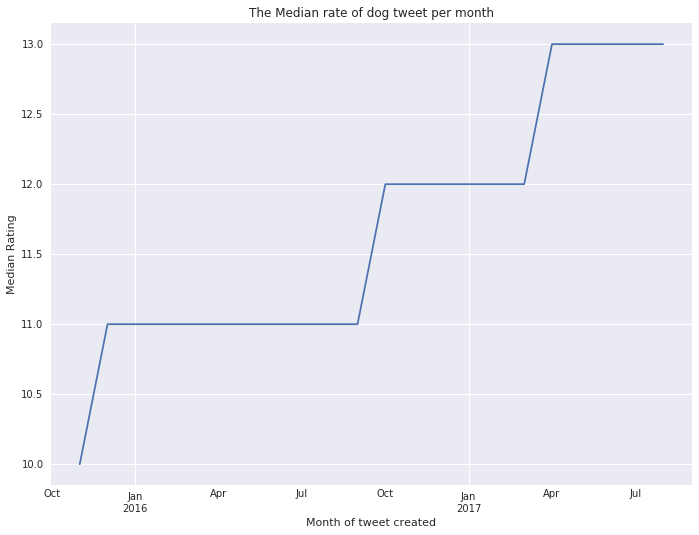

In [75]:
#Median of dog tweet per day - subplot

twitter_archive_master.groupby(twitter_archive_master['created_at'].dt.to_period("M")).median()['rating_numerator'].plot()
setlabels('Month of tweet created', 'Median Rating')
plt.title('The Median rate of dog tweet per month')

From the above plot, the rating given to dogs increases by time.

**Does @weRateDogs tweets get more tweets by popularity?** <p>
Let's first plot the number of tweet data per month.

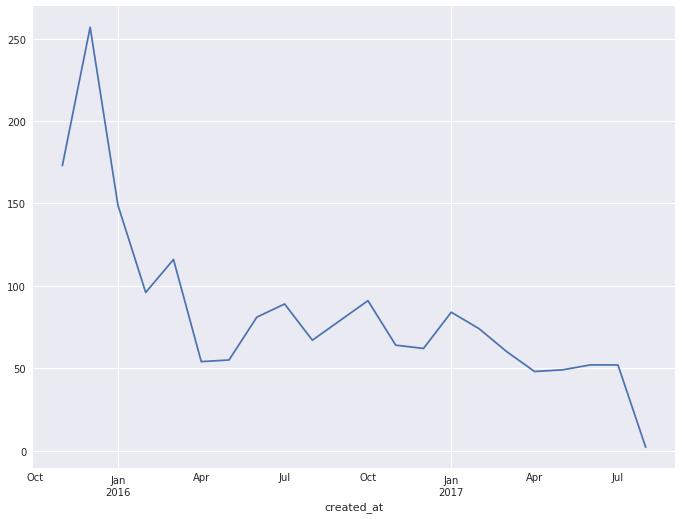

In [76]:
twitter_archive_master.groupby(twitter_archive_master['created_at'].dt.to_period("M")).count()['id'].plot()


Ignoring the sharp drop in July 2017, which might be due to the time we collected the data, the plot above shows that @weRateDogs does not become more active in rating dogs by time. Actually, the tweet count has decreased.

**what about the retweet count and the favorite count per month?** <p>
To measure the account popularity, its better to use median of the retweet count and favorite count instead of the sum, as median is less affected by outlier and the sum may be affected by the number of tweets made per month, which differs each month.

Text(0.5,1,'Median of Favorite Count and Retweet Count for each month')

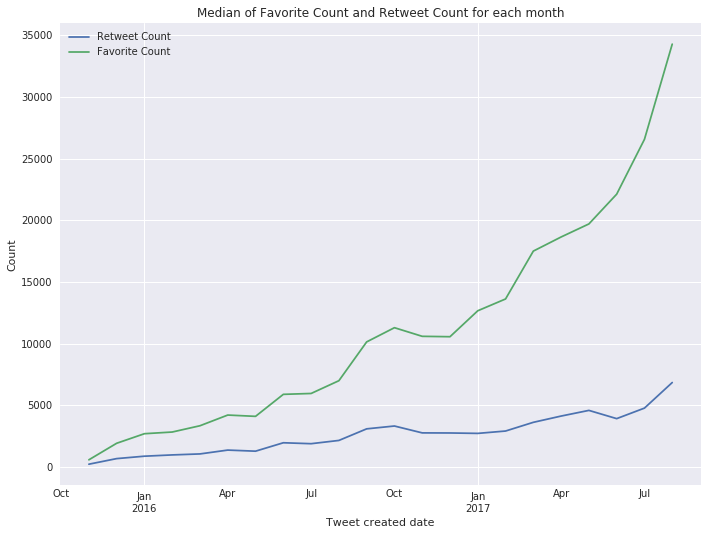

In [77]:

twitter_archive_master.groupby(twitter_archive_master['created_at'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
twitter_archive_master.groupby(twitter_archive_master['created_at'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count')

plt.legend()
setlabels('Tweet created date', 'Count')
plt.title('Median of Favorite Count and Retweet Count for each month')

From the above, we can see that there is retweet count and favorite count is increasing, despite the decrease of the number of dog rating tweet made.

**How about confidence is the image prediction?**

Text(0,0.5,'Confidence')

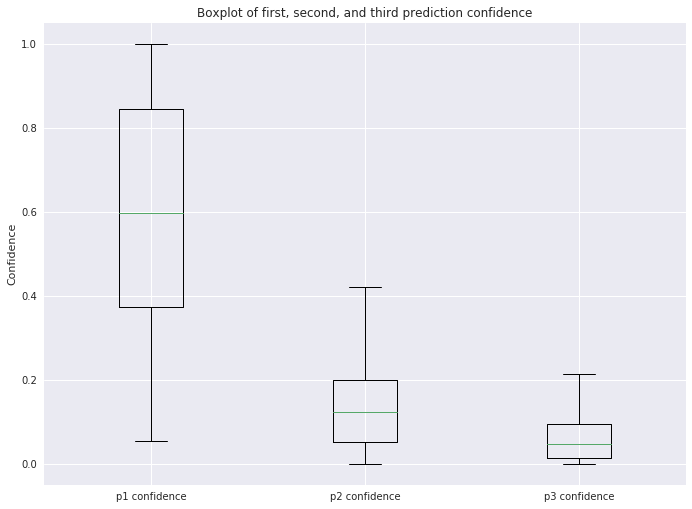

In [78]:
#image prediction - boxplot
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_archive_master.p1_conf[twitter_archive_master.p1_conf.notnull()],
    twitter_archive_master.p2_conf[twitter_archive_master.p2_conf.notnull()],
    twitter_archive_master.p3_conf[twitter_archive_master.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

From the above boxplot, we can see that first prediction tend to have higher confidence than the second and third prediction. We can also see that for the first prediction is more than 50% of the image has more than 50% confidence.